In [1]:
import torch
import torch.nn as nn
from torch.utils.data import Subset
import torchvision
import torchvision.transforms as transforms
from torchvision.models import resnet18
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
import numpy as np
def top_percent_indices(arr,percentile):
    # Convert the array to a NumPy array
    arr = np.array(arr)
    
    # Calculate the number of elements to include in the top 20%
    num_elements = int(np.ceil(percentile * len(arr)))
    
    # Get the indices of the sorted array
    sorted_indices = np.argsort(-arr)
    
    # Select the top % indices
    top_indices = sorted_indices[:num_elements]
    
    return top_indices

def bot_percent_indices(arr,percentile):
    # Convert the array to a NumPy array
    arr = np.array(arr)
    
    # Calculate the number of elements to include in the top 20%
    num_elements = int(np.ceil(percentile * len(arr)))
    
    # Get the indices of the sorted array
    sorted_indices = np.argsort(arr)
    
    # Select the bot % indices
    top_indices = sorted_indices[:num_elements]
    
    return top_indices

def remove_top_bot(learning_speeds,percentile = 0.2):
    mask = np.ones(len(learning_speeds), dtype=bool)
    top = top_percent_indices(learning_speeds,percentile)
    bot = bot_percent_indices(learning_speeds,percentile)
    mask[top] = False
    mask[bot] = False
    return learning_speeds[mask]

Results of the Mean LS experiment:

In [3]:
avg_learning_speeds_per_exp = torch.zeros(5,5)
std_learning_speeds_per_exp = torch.zeros(5)
for p in range(5):
    learning_speeds = [torch.load('first_exp/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in range(5)]
    avg_ls = torch.stack([torch.mean(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    std_ls = torch.stack([torch.std(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    avg_learning_speeds_per_exp[p] = torch.mean(avg_ls,axis = 0)
    std_learning_speeds_per_exp[p] = torch.std(torch.mean(avg_ls, axis = 1))

avg_learning_speeds_per_exp,std_learning_speeds_per_exp

/tmp/ipykernel_2563978/3775762714.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.load('first_exp/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in ran

(tensor([[9.5804, 8.8874, 9.1797, 9.3606, 9.1021],
         [9.1097, 8.6204, 9.0497, 9.6156, 9.5255],
         [9.2527, 8.6760, 8.7154, 9.4709, 9.6284],
         [9.5101, 8.4593, 9.3017, 9.5881, 9.3575],
         [9.6820, 8.5000, 9.0767, 9.0911, 9.5404]]),
 tensor([0.0297, 0.0222, 0.0363, 0.0214, 0.0596]))

In [4]:
torch.mean(avg_learning_speeds_per_exp,axis = 1)

tensor([9.2220, 9.1842, 9.1487, 9.2433, 9.1780])

In [5]:
torch.mean(avg_learning_speeds_per_exp),torch.mean(std_learning_speeds_per_exp)

(tensor(9.1952), tensor(0.0338))

Results of the Reduced Set experiment

In [6]:
avg_learning_speeds_per_exp = torch.zeros(5,5)
std_learning_speeds_per_exp = torch.zeros(5)
for p in range(5):
    learning_speeds = [torch.load('exp_cropped/ls_p'+str(p)+'_run'+str(i)+'_cropped.pt') for i in range(5)]
    learning_speeds = [l[(l>=0).nonzero(as_tuple = True)].view(5,-1) for l in learning_speeds]
    avg_ls = torch.stack([torch.mean(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    std_ls = torch.stack([torch.std(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    avg_learning_speeds_per_exp[p] = torch.mean(avg_ls,axis = 0)
    std_learning_speeds_per_exp[p] = torch.std(torch.mean(avg_ls, axis = 1))
avg_learning_speeds_per_exp,std_learning_speeds_per_exp

/tmp/ipykernel_2563978/4239694371.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.load('exp_cropped/ls_p'+str(p)+'_run'+str(i)+'_cropped.pt') fo

(tensor([[9.7659, 9.1531, 9.3174, 9.2863, 8.9428],
         [8.8673, 8.9777, 8.9690, 9.6832, 9.7355],
         [9.3138, 9.2271, 8.7120, 9.6182, 9.7569],
         [9.4001, 8.2472, 9.5792, 9.7163, 9.2290],
         [9.7275, 8.6490, 9.4827, 8.8383, 9.6231]]),
 tensor([0.0821, 0.0530, 0.0706, 0.0550, 0.0856]))

In [7]:
torch.mean(avg_learning_speeds_per_exp,axis = 1)

tensor([9.2931, 9.2465, 9.3256, 9.2344, 9.2641])

In [8]:
torch.mean(avg_learning_speeds_per_exp),torch.mean(std_learning_speeds_per_exp)

(tensor(9.2727), tensor(0.0692))

Results of the batch position experiment

In [11]:
avg_learning_speeds_per_exp = torch.zeros(5,5)
std_learning_speeds_per_exp = torch.zeros(5)
for p in range(5):
    learning_speeds = [torch.load('default_exp/ls_p'+str(p)+'_'+str(i)+'_default.pth') for i in range(5)]
    avg_ls = torch.stack([torch.mean(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    std_ls = torch.stack([torch.std(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    avg_learning_speeds_per_exp[p] = torch.mean(avg_ls,axis = 0)
    std_learning_speeds_per_exp[p] = torch.std(torch.mean(avg_ls, axis = 1))

avg_learning_speeds_per_exp,std_learning_speeds_per_exp

/tmp/ipykernel_2563978/4030947502.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.load('default_exp/ls_p'+str(p)+'_'+str(i)+'_default.pth') for 

(tensor([[9.5734, 8.8171, 9.1610, 9.3170, 9.1262],
         [9.0115, 8.7206, 8.7160, 9.5882, 9.5248],
         [9.2003, 8.5772, 8.6132, 9.4615, 9.5846],
         [9.4744, 8.2079, 9.2587, 9.5885, 9.2294],
         [9.6613, 8.4418, 9.0013, 9.1239, 9.5485]]),
 tensor([0.0322, 0.0449, 0.0258, 0.0433, 0.0427]))

In [12]:
torch.mean(avg_learning_speeds_per_exp,axis = 1)

tensor([9.1989, 9.1122, 9.0874, 9.1518, 9.1553])

In [13]:
torch.mean(avg_learning_speeds_per_exp),torch.mean(std_learning_speeds_per_exp)

(tensor(9.1411), tensor(0.0378))

In [14]:
avg_learning_speeds_per_exp = torch.zeros(5,5)
std_learning_speeds_per_exp = torch.zeros(5)
for p in range(5):
    learning_speeds = [torch.stack([remove_top_bot(t) for t in torch.load('default_exp/ls_p'+str(p)+'_'+str(i)+'_default.pth')]) for i in range(5)]
    avg_ls = torch.stack([torch.mean(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    std_ls = torch.stack([torch.std(learning_speeds[i],axis = 1) for i in range(len(learning_speeds))])
    avg_learning_speeds_per_exp[p] = torch.mean(avg_ls,axis = 0)
    std_learning_speeds_per_exp[p] = torch.std(torch.mean(avg_ls, axis = 1))
   
avg_learning_speeds_per_exp,std_learning_speeds_per_exp

/tmp/ipykernel_2563978/3006357765.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.stack([remove_top_bot(t) for t in torch.load('default_exp/ls_p

(tensor([[9.9564, 9.4689, 9.6140, 9.4855, 9.2770],
         [9.1312, 9.3207, 9.1562, 9.9441, 9.9488],
         [9.4516, 9.3217, 9.0523, 9.7735, 9.9671],
         [9.7332, 8.6830, 9.7731, 9.9619, 9.4920],
         [9.9792, 8.9949, 9.6363, 9.2137, 9.8930]]),
 tensor([0.0345, 0.0431, 0.0349, 0.0400, 0.0485]))

In [15]:
torch.mean(avg_learning_speeds_per_exp,axis = 1)

tensor([9.5604, 9.5002, 9.5132, 9.5286, 9.5434])

In [16]:
torch.mean(avg_learning_speeds_per_exp),torch.mean(std_learning_speeds_per_exp)

(tensor(9.5292), tensor(0.0402))

In [49]:
avg_learning_speeds_per_bp = torch.zeros(5,11)
std_learning_speeds_per_bp = torch.zeros(5,11)
full_std = torch.zeros(5,5,11)
std_bp_run = torch.zeros(11) 
for p in range(5):
    learning_speeds = [torch.load('exp_batchpos/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in range(5)]
    batch_positions = [torch.load('exp_batchpos/bp_p'+str(p)+'_run'+str(i)+'.pt') for i in range(5)]
    ls_per_bp = torch.zeros(5,11)
    for exp,(ls,bp) in enumerate(zip(learning_speeds,batch_positions)):
        bps=torch.zeros(11)
        for i in range(11):
            bps[i]= (torch.mean(bp[(ls == i).nonzero(as_tuple=True)],axis = 0))
            full_std[p,exp,i] = torch.std(bp[(ls == i).nonzero(as_tuple=True)],axis = 0)
        ls_per_bp[exp]= bps
    avg_learning_speeds_per_bp[p] = torch.mean(ls_per_bp,axis = 0)
    std_learning_speeds_per_bp[p] = torch.std(ls_per_bp,axis = 0)

print(avg_learning_speeds_per_bp)
print(torch.mean(avg_learning_speeds_per_bp,axis = 0))

tensor([[38.6590, 37.7892, 37.9849, 37.9734, 38.1528, 38.4797, 38.5080, 38.3646,
         38.3163, 38.5702, 38.6230],
        [37.6688, 38.2135, 38.0136, 38.5578, 38.4460, 38.4364, 38.5444, 38.1693,
         38.3616, 38.6135, 38.6011],
        [38.7922, 38.7649, 38.2884, 38.1520, 38.4435, 38.3852, 38.2940, 38.4709,
         38.3023, 38.5920, 38.6093],
        [38.7821, 37.9130, 37.8344, 38.2927, 38.3604, 38.3297, 38.2443, 38.3450,
         38.2912, 38.6462, 38.6007],
        [38.2494, 38.1527, 38.2381, 38.3972, 38.1593, 38.3962, 38.3764, 38.3930,
         38.3316, 38.6280, 38.5953]])
tensor([38.4303, 38.1667, 38.0719, 38.2746, 38.3124, 38.4054, 38.3934, 38.3486,
        38.3206, 38.6100, 38.6059])


/tmp/ipykernel_2563978/1186674001.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.load('exp_batchpos/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in 

In [55]:
torch.mean(full_std,axis= (1,0))

tensor([7.5291, 7.5279, 7.5985, 7.4957, 7.6130, 7.4910, 7.4635, 7.5083, 7.5408,
        7.5149, 7.5010])

In [59]:
def plot(data,names,title):
    fig, ax = plt.subplots()
    
    for i, d in enumerate(data):
        # Plot the values
        ax.plot(range(len(d)),d, marker='o', label=names[i])
    
    ax.set_xlabel('Learning Speed')
    ax.set_ylabel('AVG batch position')
    plt.yticks(np.arange(37.0, 41.0, 1.0))
    ax.legend()
    plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    plt.savefig(f'{f_name}.pdf', format="pdf")
    plt.show()
      

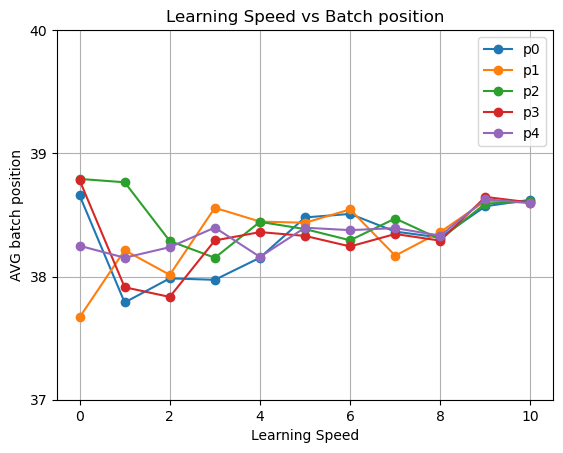

In [60]:
plot(avg_learning_speeds_per_bp,'p0,p1,p2,p3,p4'.split(','),'Learning Speed vs Batch position')

In [61]:
def plot_std(data,data_std,names,title):
    fig, ax = plt.subplots()
    
    for i, (d,std) in enumerate(zip(data,data_std)):
        # Plot the values
        ax.errorbar(range(len(d)),d,std, marker='o',linestyle='None', label=names[i])
    
    ax.set_xlabel('Learning Speed')
    ax.set_ylabel('AVG batch position')
    plt.yticks(np.arange(30.0, 50.0, 2.5))
    ax.legend()
    plt.title(title)
    ax.grid(True)
    f_name = title.replace(' ','_')
    plt.savefig(f'{f_name}_std.pdf', format="pdf")
    plt.show()
    

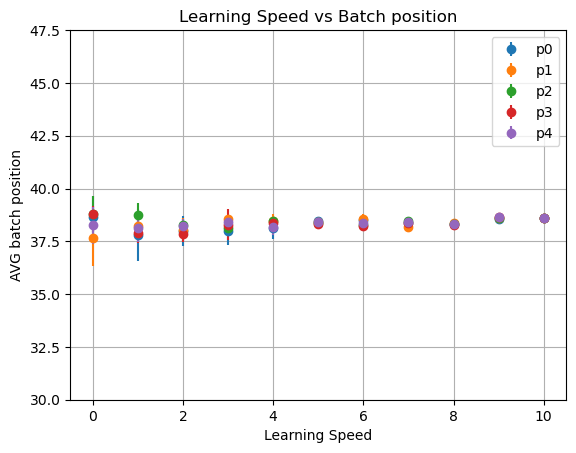

In [62]:
plot_std(avg_learning_speeds_per_bp,std_learning_speeds_per_bp,'p0,p1,p2,p3,p4'.split(','),'Learning Speed vs Batch position')

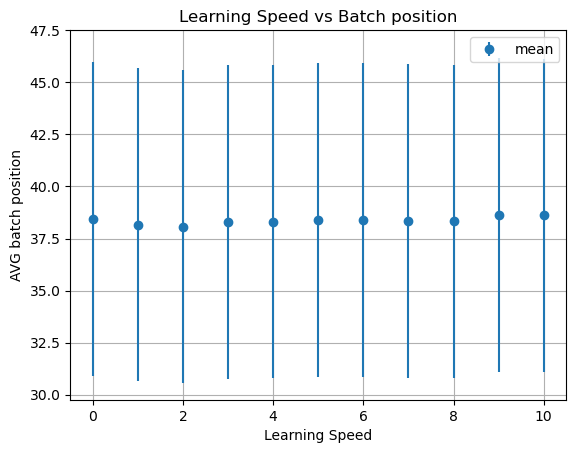

In [63]:
plot_std([torch.mean(avg_learning_speeds_per_bp,axis = 0)],torch.mean(full_std,axis= (1,0)),['mean'],'Learning Speed vs Batch position')

In [65]:
bps = torch.zeros(11)
for p in range(5):
    learning_speeds = [torch.load('exp_batchpos/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in range(5)]
    batch_positions = [torch.load('exp_batchpos/bp_p'+str(p)+'_run'+str(i)+'.pt') for i in range(5)]
    for exp,(ls,bp) in enumerate(zip(learning_speeds,batch_positions)):
        for i in range(11):
            bps[i] += len(bp[(ls == i).nonzero(as_tuple=True)])
        
bps


/tmp/ipykernel_2563978/2458379327.py:3: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  learning_speeds = [torch.load('exp_batchpos/ls_p'+str(p)+'_run'+str(i)+'.pt') for i in 

tensor([  1708.,   3043.,   4974.,   7490.,  11307.,  17188.,  26471.,  43880.,
         85662., 359418., 688859.])

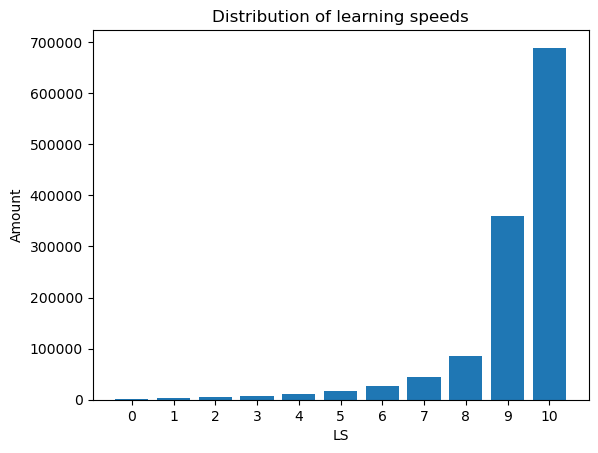

In [66]:
labels = range(11)


plt.bar(labels, bps)
plt.xticks(np.arange(0, 11, 1))
plt.title('Distribution of learning speeds')
plt.xlabel('LS')
plt.ylabel('Amount')
plt.savefig(f'LS_dist.pdf', format="pdf")
plt.show()

In [69]:
torch.tensor([9.2220, 9.1842, 9.1487, 9.2433, 9.1780]) - torch.tensor([9.1989, 9.1122, 9.0874, 9.1518, 9.1553])

tensor([0.0231, 0.0720, 0.0613, 0.0915, 0.0227])

In [71]:
torch.tensor([0.0297, 0.0222, 0.0363, 0.0214, 0.0596])- torch.tensor([0.0322, 0.0449, 0.0258, 0.0433, 0.0427])

tensor([-0.0025, -0.0227,  0.0105, -0.0219,  0.0169])